# Análise de conjunto de dados, disponibilizados na plataforma Kaggle
Fontes Principais:
1. Forças Armadas da Ucrânia
https://www.zsu.gov.ua/en

2. Ministério da defesa da Ucrânia
https://www.mil.gov.ua/en/

Inicialmente, o intuito é saber sobre o número de fatalidades(mortes de militares em operação) russas, para que se possa calcular tendências futuras no decorrer do conflito;

Conjunto de dados disponivél em -> https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

In [1]:
#   Importando bibliotecas pertinentes
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import numpy as np
import kaggle
from zipfile import ZipFile


In [2]:
#   Puxando DataSet da API do Kaggle
!kaggle datasets download -d piterfm/2022-ukraine-russian-war --force


  0%|          | 0.00/2.50k [00:00<?, ?B/s]
100%|██████████| 2.50k/2.50k [00:00<00:00, 2.55MB/s]


In [3]:
#   Criando o DataFrame
zip_file = ZipFile('2022-ukraine-russian-war.zip')
df = pd.read_csv(zip_file.open('russia_losses_personnel.csv'), usecols=[0, 1, 2, 4])

In [4]:
df.head(3)

,date,day,personnel,POW
0,2022-02-25,2,2800,0
1,2022-02-26,3,4300,0
2,2022-02-27,4,4500,0


In [5]:
#   Traduzindo headers e dando uma olhada no DataFrame
df.columns=['data', 'dia_conflito', 'total_fatalidades', 'total_prisioneiros']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   data                68 non-null     object
 1   dia_conflito        68 non-null     int64 
 2   total_fatalidades   68 non-null     int64 
 3   total_prisioneiros  68 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ KB


Verifica-se nos dois blocos acima que a data além de estar como 'object', está no padrão internacional e tabém não encontramos entradas nulas no DataFrame

In [6]:
#   Modelando a data
#   Mudando o tipo primitivo
df['data'] = pd.to_datetime(df.data)

#   Mudando o formato de data de mes/dia para dia/mes
df['data'] = df['data'].dt.strftime('%d/%m/%Y')
df.head(3)


,data,dia_conflito,total_fatalidades,total_prisioneiros
0,25/02/2022,2,2800,0
1,26/02/2022,3,4300,0
2,27/02/2022,4,4500,0


In [7]:
#   O DataFrame tem apenas o valor acumulado, então vamos calcular o valor dia-a-dia
df['fatalidades_no_dia'] = df['total_fatalidades'].diff( ) 
df.at[0, 'fatalidades_no_dia'] = 2800
df['fatalidades_no_dia'] = df['fatalidades_no_dia'].astype(int)



In [8]:
#   Dando uma olhada no DataFrame inteiro
pd.set_option('display.max_rows', 100)
display(df)

,data,dia_conflito,total_fatalidades,total_prisioneiros,fatalidades_no_dia
0,25/02/2022,2,2800,0,2800
1,26/02/2022,3,4300,0,1500
2,27/02/2022,4,4500,0,200
3,28/02/2022,5,5300,0,800
4,01/03/2022,6,5710,200,410
5,02/03/2022,7,5840,200,130
6,03/03/2022,8,9000,200,3160
7,04/03/2022,9,9166,200,166
8,05/03/2022,10,10000,216,834
9,06/03/2022,11,11000,232,1000


<AxesSubplot:title={'center':'Fatalidades russas no conflito'}>

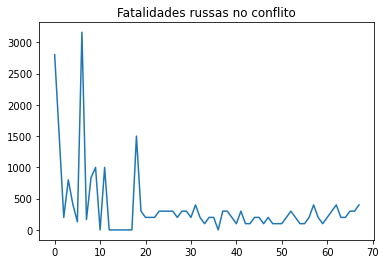

In [64]:
#   Plotando um gráfico para visualização da evolução do conlfito
df['fatalidades_no_dia'].plot.line(title='Fatalidades russas no conflito')

In [10]:
#   Modelando casas flutuantes e gerando um descritivo rápido das informações
pd.set_option('display.precision', 2)
df['fatalidades_no_dia'].describe()

count      68.00
mean      355.88
std       547.33
min         0.00
25%       100.00
50%       200.00
75%       300.00
max      3160.00
Name: fatalidades_no_dia, dtype: float64

# Podemos verificar nos blocos acima que:
-> No começo do conflito estava havendo mais fatalidades;


-> Houveram 68 dias de conflito;

-> A média de morte/dia(fatalidades) de soldados russos é de 355.88

-> Em 25% dos dias houveram mais de 100 fatalidades russas;

-> Em 50% dos dias houveram mais de 200 fatalidades russas;

-> Em 75% dos dias houveram mais de 300 fatalidades russas;


In [11]:
#   Exibindo os 8 dias com maior número de fatalidades
df.nlargest(8, 'fatalidades_no_dia') 

,data,dia_conflito,total_fatalidades,total_prisioneiros,fatalidades_no_dia
6,03/03/2022,8,9000,200,3160
0,25/02/2022,2,2800,0,2800
1,26/02/2022,3,4300,0,1500
18,15/03/2022,20,13500,389,1500
9,06/03/2022,11,11000,232,1000
11,08/03/2022,13,12000,284,1000
8,05/03/2022,10,10000,216,834
3,28/02/2022,5,5300,0,800


In [12]:
#   Exibindo 8 dias com menor número de fatalidades
df.nsmallest(8, 'fatalidades_no_dia')

,data,dia_conflito,total_fatalidades,total_prisioneiros,fatalidades_no_dia
10,07/03/2022,12,11000,259,0
12,09/03/2022,14,12000,360,0
13,10/03/2022,15,12000,371,0
14,11/03/2022,16,12000,389,0
15,12/03/2022,17,12000,389,0
16,13/03/2022,18,12000,389,0
17,14/03/2022,19,12000,389,0
36,02/04/2022,38,17700,460,0


In [58]:
#   Definindo variáveis
dias_conflito = df['dia_conflito'].max()
media_fat = round(df['fatalidades_no_dia'].mean() ,2)
total_fat = df['total_fatalidades'].max()
df30 = df[df['dia_conflito'] >= (dias_conflito-30)]
med_fat30 =round(df30['fatalidades_no_dia'].mean(), 2)


print('-'*66)
print(f'{"Análise do Conflito":^66}')
print('-'*66)
print(f'''{'Duração do conflito: ':<45}   {dias_conflito} dias
{'Média de fatalidades dia:':<45}   {media_fat} fatalidades
{'Média de fatalidads últimos 30 dias:':<45}   {med_fat30} fatalidades
{'Total de fatalidades russsas:':<45}   {total_fat}  fatalidades''') 
print('-'*66)


------------------------------------------------------------------
                       Análise do Conflito                        
------------------------------------------------------------------
Duração do conflito:                            69 dias
Média de fatalidades dia:                       355.88 fatalidades
Média de fatalidads últimos 30 dias:            209.68 fatalidades
Total de fatalidades russsas:                   24200  fatalidades
------------------------------------------------------------------


In [63]:
#   Em breve colocarei as tendências